# EE123 Lab 2: Software Defined Radio -  Part I

### Written by Miki Lustig

## Frequency analysis using the DFT and windowing

In this lab you will reproduce the frequency analysis slides I demonstrated in class, and look at the effect of using different windows, length of sequence and averaging

In [5]:
# Import functions and libraries
import numpy as np, matplotlib.pyplot as plt
from numpy import *
from numpy.fft import *
from matplotlib.pyplot import *

import numpy.fft as fft

%matplotlib inline

The following code implements the windowing slides that were shown in the lecture:

In [2]:
def pltWindowedFFT(y, N):
    # functions takes a signal y, multiplies it with several windows
    # , computes the N-length DFT of the (zero-padded) sequence
    # and displays its single sided spectrum.
    #
    #  y -  Signal
    #  N -  Length of DFT (zero-padding)
    
    L = len(y)
    Y_rect = fft.fft(y,N) 
    Y_rect = 20*log10(abs(Y_rect)/max(abs(Y_rect)))
    Y_bart = fft.fft(y*np.bartlett(L),N)
    Y_bart = 20*log10(abs(Y_bart)/max(abs(Y_bart)))
    Y_hann = fft.fft(y*np.hanning(L),N)
    Y_hann = 20*log10(abs(Y_hann)/max(abs(Y_hann)))
    Y_hamm = fft.fft(y*np.hamming(L),N)
    Y_hamm = 20*log10(abs(Y_hamm)/max(abs(Y_hamm)))
    Y_kaiser = fft.fft(y*np.kaiser(L,6),N)
    Y_kaiser = 20*log10(abs(Y_kaiser)/max(abs(Y_kaiser)))
    Y_kaiser9 = fft.fft(y*np.kaiser(L,9),N)
    Y_kaiser9 = 20*log10(abs(Y_kaiser9)/max(abs(Y_kaiser9)))
    
    
    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_rect[0:N//2])
    plt.title('Rect')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig1.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_bart[0:N//2])
    plt.title('Triangle')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig2.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_hamm[0:N//2])
    plt.title('Hamming')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig3.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_hann[0:N//2])
    plt.title('Hann')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig4.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_kaiser[0:N//2])
    plt.title('Kaiser Beta=6')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig5.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_kaiser9[0:N//2])
    plt.title('Kaiser Beta=9')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig6.png', transparent=True,bbox_inches='tight')


Here we generate a 128 length sequence. The sequence is a sum of sinusoid that are close in frequency, but havea large dynamic range in the amplitude. We first compute the DFT of the sequence with different windows. The different window functions will trade-off the main-lobe width with side-lobes spectral artifacts. 

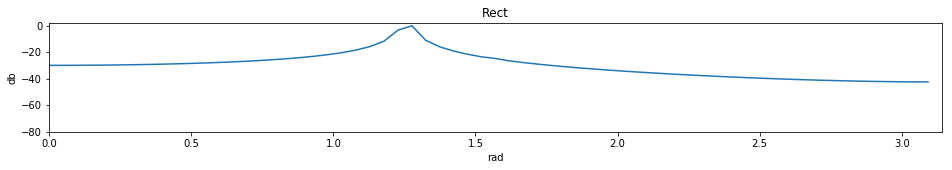

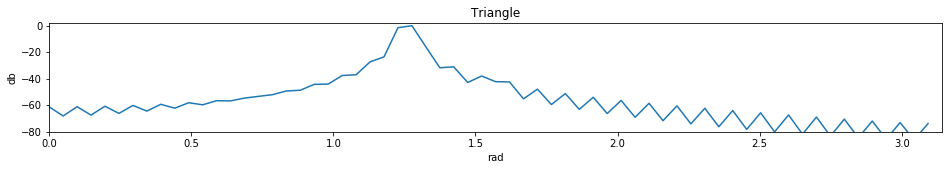

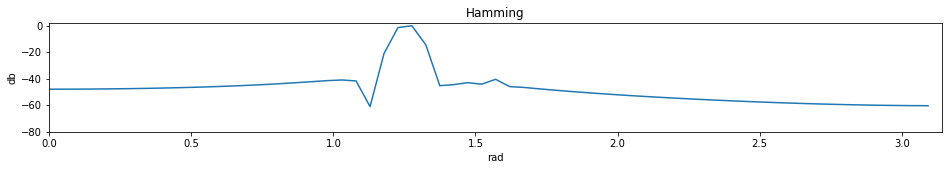

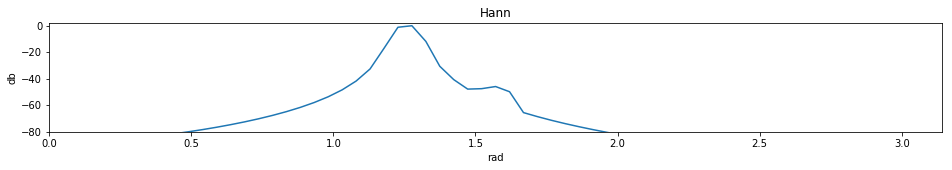

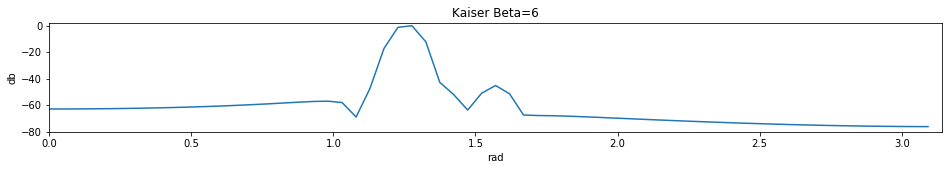

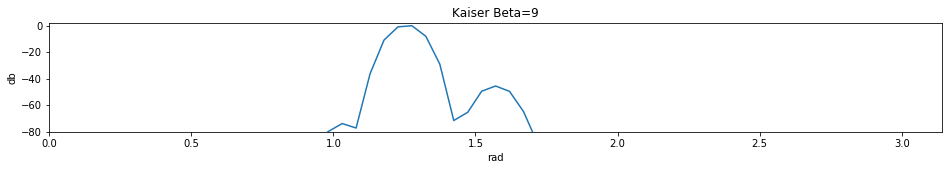

In [4]:
noise_std = 0  # standard deviation of additive noise
N = 128      # FFT size
L = 128       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2  # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

## Task 1: zero-padding

As you can see, the spectrum does not look "nice". In order to evaluate the spectrum at more points, in a way that is closer to how the DTFT would look, we need to zero-pad. 

* Zero pad the sequence to 256. Can you see improvement? Did the peak width, and the sidelobes amplitude change?
* Zero pad the sequence to 512, 1024, 4096. Will increasing the zero-padding further change the shape of the spectrum? 

Run each experiment in a different cell, so you can see the result better. 

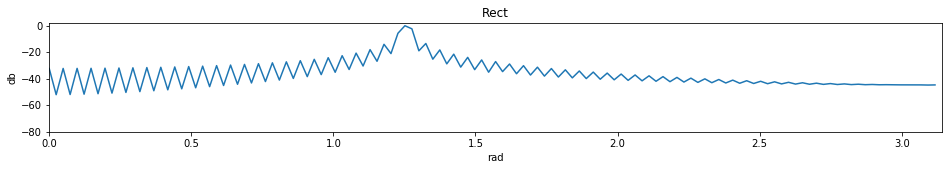

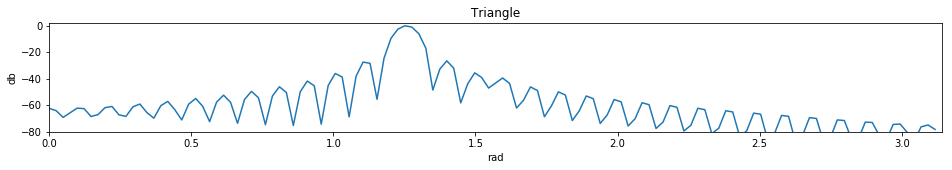

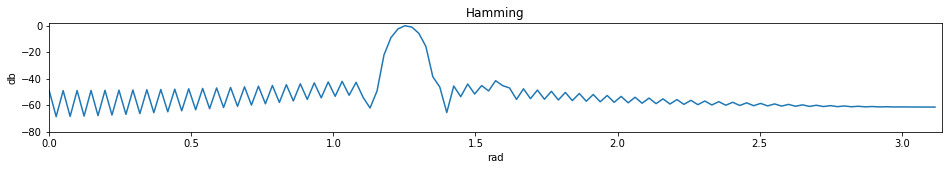

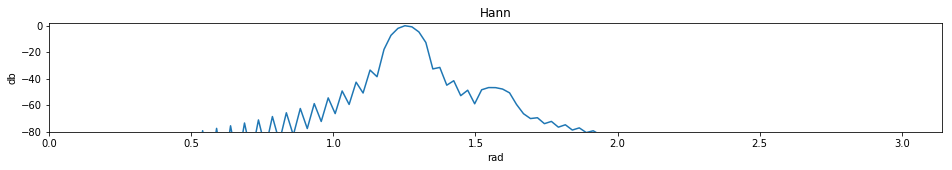

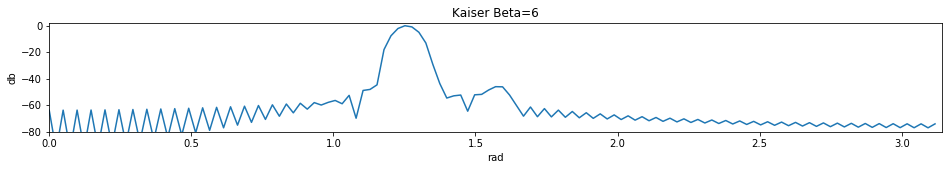

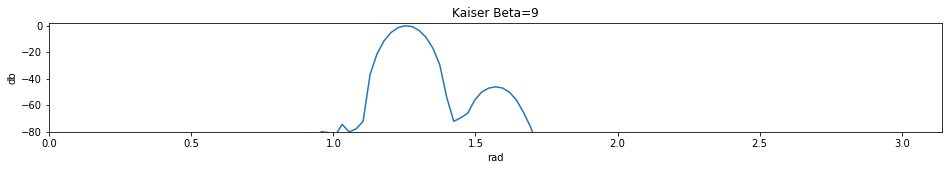

In [5]:
# your code here


noise_std = 0  # standard deviation of additive noise
N = 256      # FFT size
L = 128       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2  # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)


Answers here:

_____






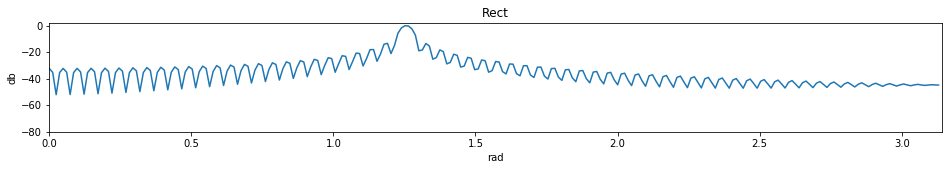

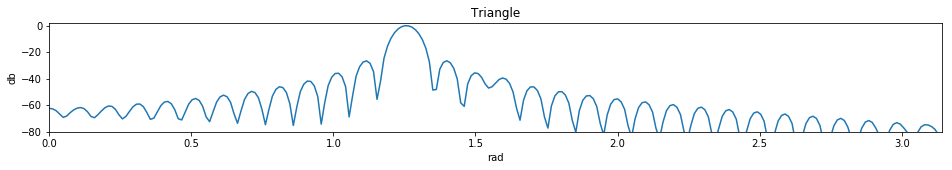

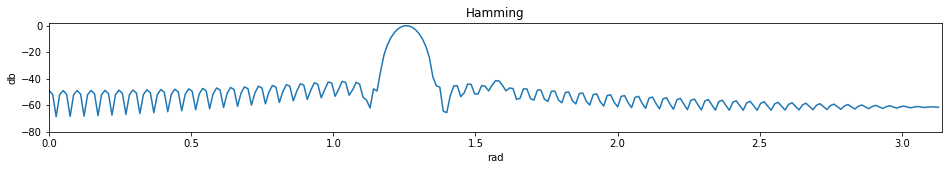

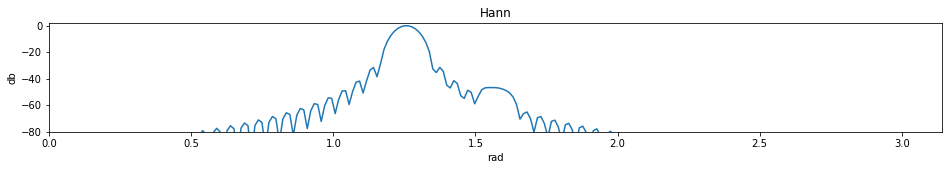

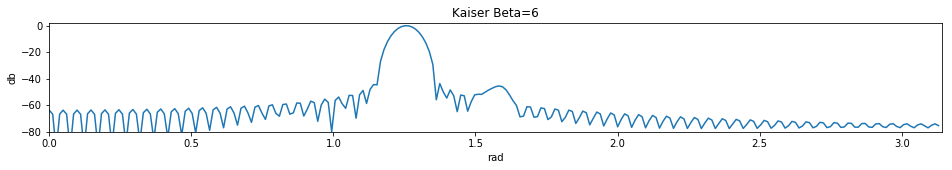

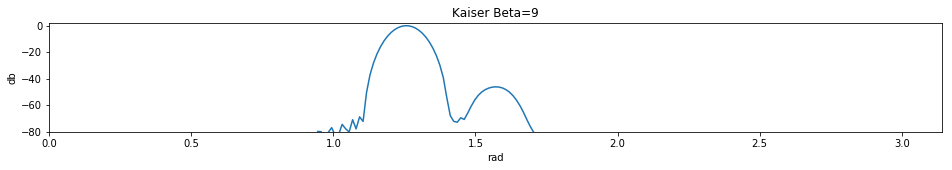

In [6]:
# your code here

noise_std = 0  # standard deviation of additive noise
N = 512      # FFT size
L = 128       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2  # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)



Answers here:
The Peak width did not change and the side lobe amplitude remained the same. There is an improvement in resolution.
_____






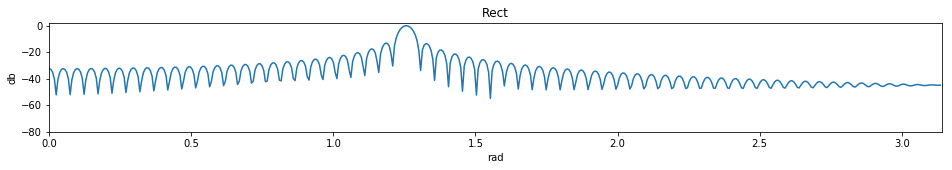

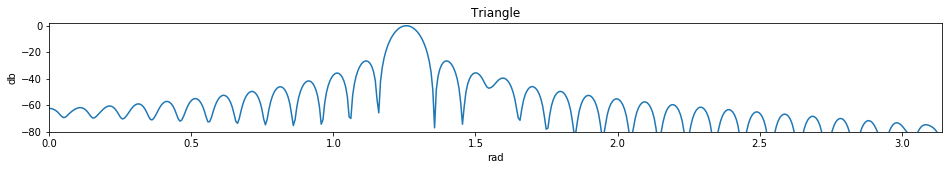

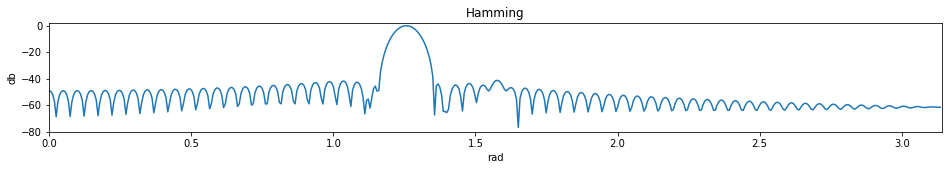

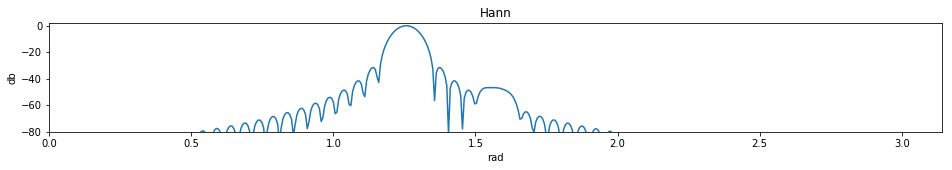

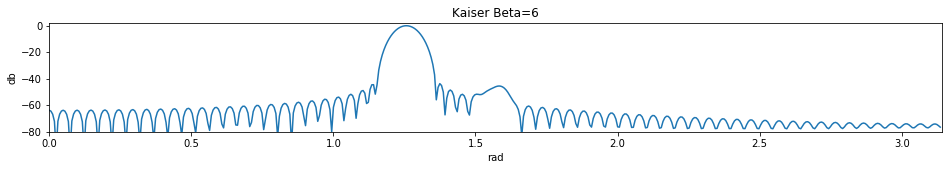

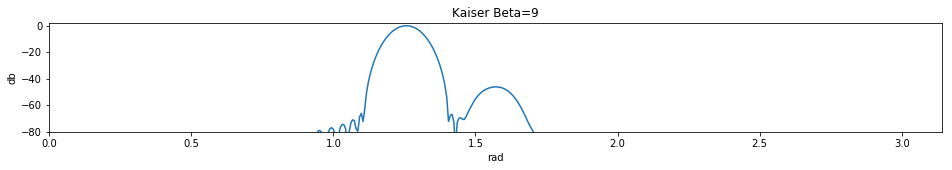

In [7]:
# your code here

noise_std = 0  # standard deviation of additive noise
N = 1024      # FFT size
L = 128       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2  # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)



Answers here:

_____






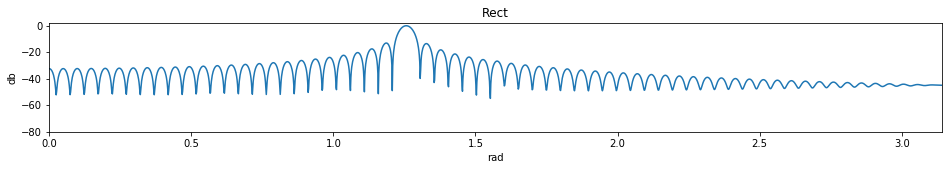

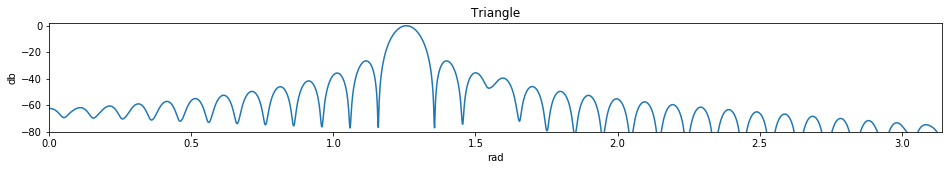

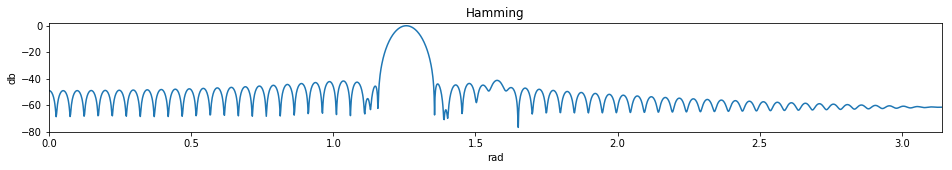

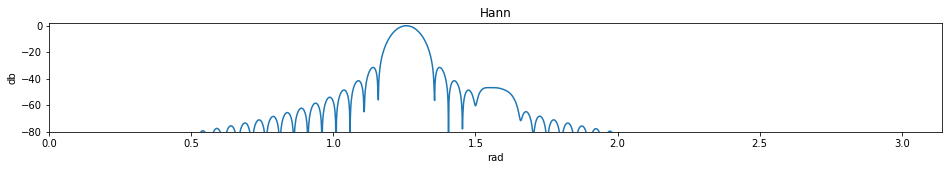

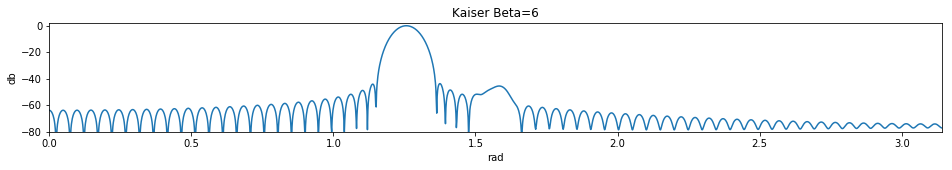

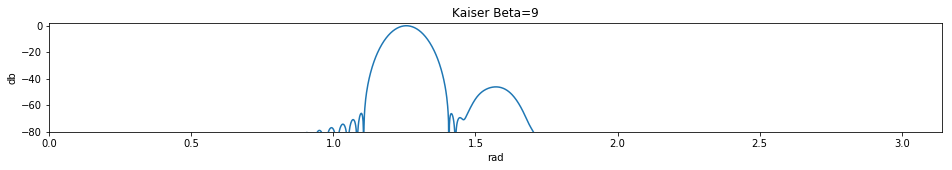

In [8]:
# your code here

noise_std = 0  # standard deviation of additive noise
N = 4096      # FFT size
L = 128       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2  # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)



Answers here: Increasing the zero padding would increase the resolution of the signal.

_____






## Task 2: Window sizes and noise

In this task will will add Gaussian noise with standard deviation of 0.01 to the sequence. We will look at how increasing the sequence length imroves the spectral resolution, as well as the signal-to-noise ratio of the spectrum.

Set the DFT length to N=4096, and set noise_std=0.01

* Generate the sequence for L=128 and plot the windowed spectra. Can you see the small peak? 
* Generate the sequence for L=512 and plot the windowed spectra. Can you see the small peak? Comment on the resolution of the peaks
* Generate the sequence for L=2048 and plot the windowed spectra. Comment on the signal-to-noise ratio? Comment on the resolution of the peaks

#### In general, for stationary signals, increasing the size of the window by an order of $P$, will result in improved SNR of $\sqrt{P}$

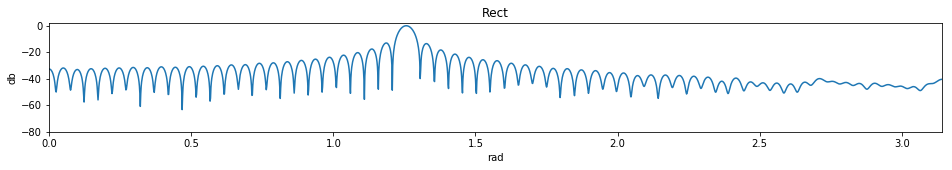

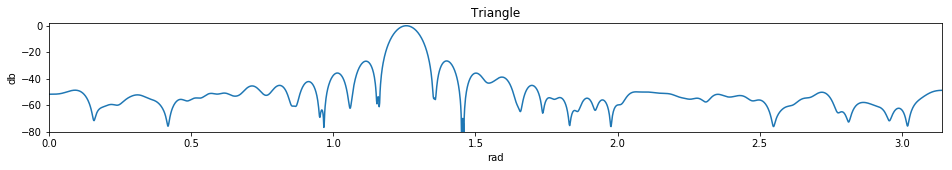

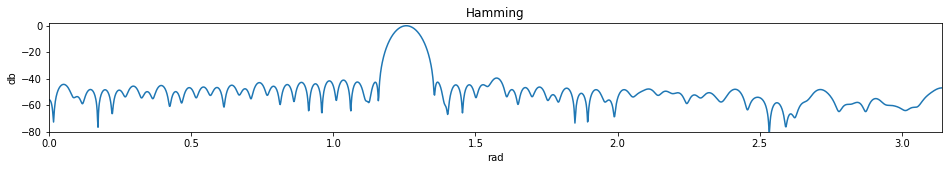

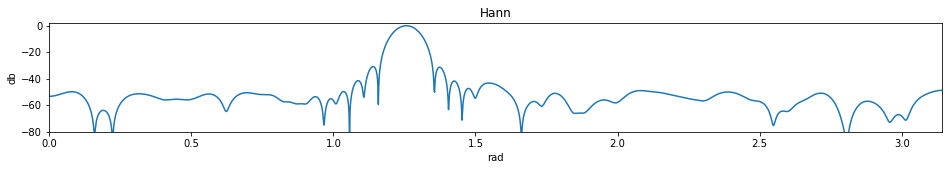

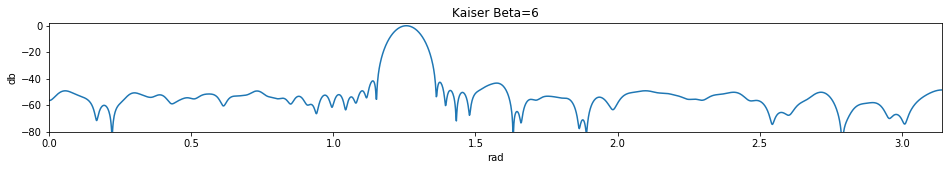

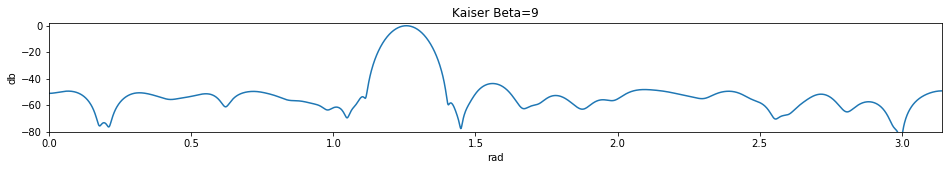

In [9]:
# Generate the sequence for L=128 and plot the windowed spectra. Can you see the small peak? 

noise_std = 0.01  # standard deviation of additive noise
N = 4096      # FFT size
L = 128       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2  # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

Answers Here: Yes, we can see the small peak.
___

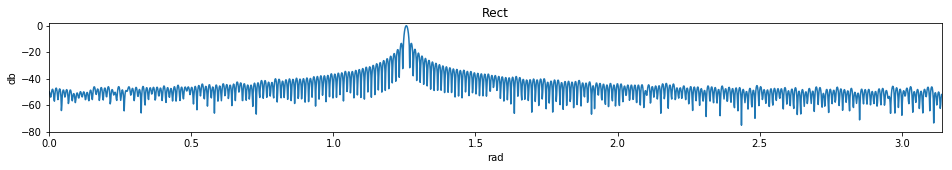

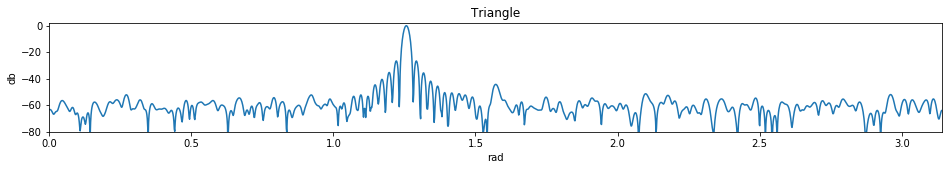

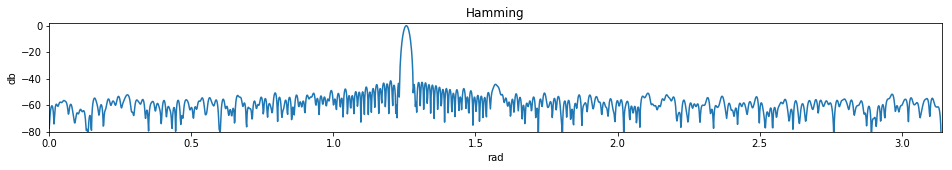

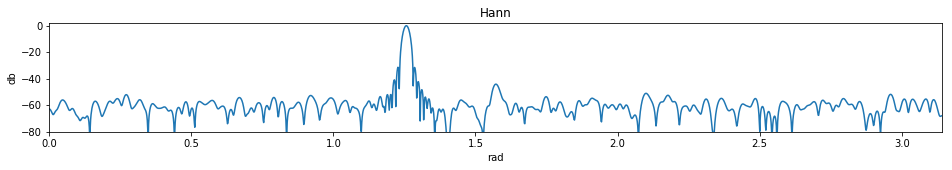

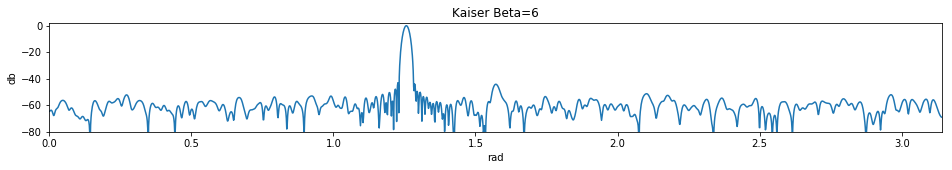

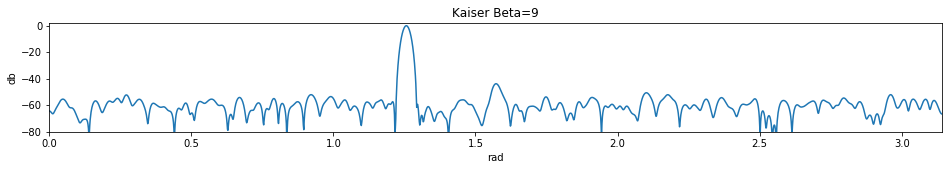

In [10]:
# Generate the sequence for L=512 and plot the windowed spectra. Can you see the small peak? 
# Comment on the resolution of the peaks

noise_std = 0.01  # standard deviation of additive noise
N = 4096      # FFT size
L = 512       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2  # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

Answers Here: We can see the small peaks and the resolution of the signal is improved
___

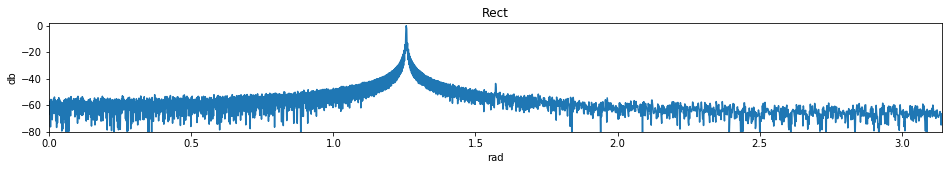

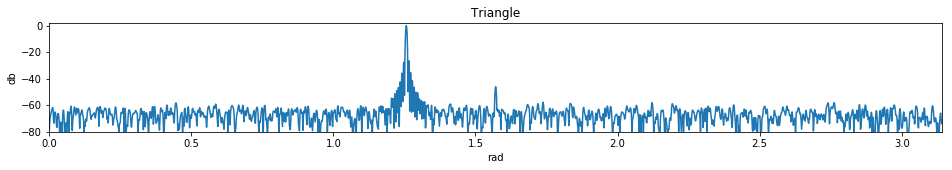

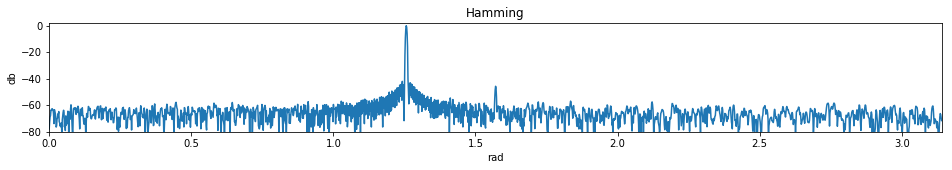

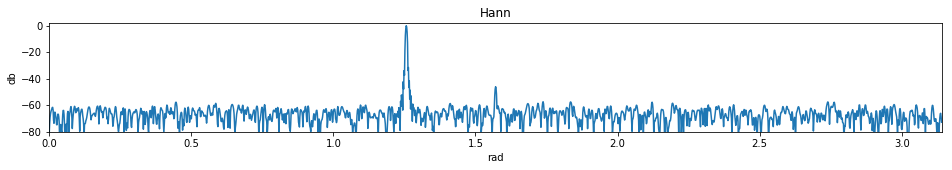

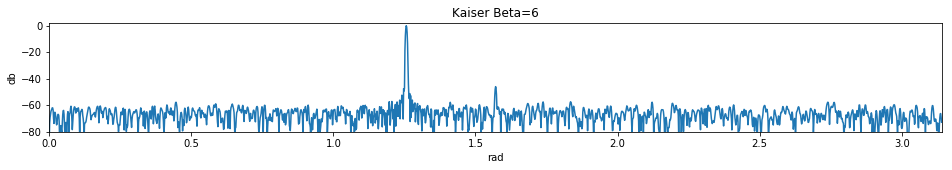

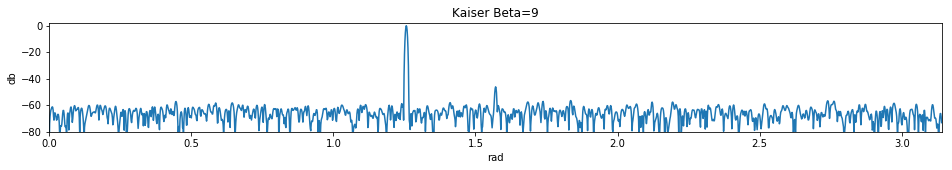

In [11]:
# Generate the sequence for L=2048 and plot the windowed spectra. 
# Comment on the signal-to-noise ratio? Comment on the resolution of the peaks

noise_std = 0.01  # standard deviation of additive noise
N = 4096      # FFT size
L = 2048       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2  # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)



Answers Here: The signal to noise ration is much higher with an increase in window size. The resolution also improves with increasing window size
___

## Task 3: Average Power Spectrum

As we increasing the size of the window, the SNR of our spectrum improves, and also resolution of the spectrum improves. However, sometimes we are not necessarily interested in increasing the resolution or sized of our FFTs, but we may be interested in getting better SNR. 

One way to do so is to break the sequence into non-overlapping sections of the desired length. Compute their magnitude spectrum and then average the result. This is often called average power spectrum. It is important to note, that averageing the complex spectrum will often not result in a desired outcome. The reason is that the phase of the peaks in each segment may be different, depending on how we break the sequence and what are the frequencies involved. In that case, complex averaging will probably lead to cancelation of the signal. 


* Set the DFT length to N=4096, and set noise_std=0.01. Generate the sequence with total length of: 10240. 
* Break the sequence into 20 segments of L=512. Window each segment with a Kaiser window with $\beta=6$. 
* Zero-pad each segment to length N=4096 and compute the FFT. 
* Compute the average the magnitude of the spectra, and display the result using the function ``semilogy`` 
* For comparison, compute the average of the complex spectra and then take the magnitude and display the result. 
* Compare the result of the average power spectrum to the spectrum of the Kaser window in Task 2


In [8]:
# Your code below:


noise_std = 0.01  # standard deviation of additive noise
N = 4096      # FFT size
L = 10240       # Window size

for i in range (0,19):
    n = np.r_[i*512:(i+1)*512]


    omega1 = 2*pi*0.2  # frequency 1
    omega2 = 2*pi*0.25    # frequency 2
    A1 = 1                # amplitude of 1st sinusoid
    A2 = 0.005            # amplitude of second sinusoid
    y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std
    Y_kaiser6 = fft.fft(y*np.kaiser(L,6),N) #window segments with Kaiser Window $\beta =6$
    Y_kaiser6 = 20*log10(abs(Y_kaiser6)/max(abs(Y_kaiser6)))


# compute mean
Pspect = mean(abs(X),axis=0);
Pspect_cplx = abs(mean(X,axis=0));


# Plotting:

fig = figure(figsize=(16,2))
semilogy(r_[0.0:N/2.0]/N*2*pi,Pspect[0:N//2])
plt.xlabel('rad')
plt.title('Average power spectrum')
fig = figure(figsize=(16,2))
semilogy(r_[0.0:N/2.0]/N*2*pi,Pspect_cplx[0:N//2])
plt.xlabel('rad')
title('Complex average of the spectrum')


ValueError: operands could not be broadcast together with shapes (512,) (10240,) 

Answers Here:
___